# 1. NLP 이론문제

### 문제 1

n-gram이 지닌 한계 2가지를 간단히 서술하세요.

답 : 1.다음에 올 확률을 계산하고 싶은 문장/단어가 갖고 있는 데이터 내에서 매우 희소하다.
2. 문장이 길어질수록 전통적 카운트 모델이 다음 단어를 계산하기 어려워진다

### 문제 2: T/F

Perplexity(PPL)의 값이 낮을수록 모델의 성능은 좋다.

답 : True

### 문제 3

DTM.jpg

피처 벡터화에 있어서 위와 같은 행렬의 명칭과 이 행렬이 지니는 장점과 단점을 한 가지씩 서술하시오.

행렬의 명칭: 문서-단어 행렬
- 장점: BoW보다 구체적으로 문서-단어 간 관계를 포착할 수 있다.
- 단점: BoW와 마찬가지로 단어의 순서, 문맥을 고려하지 않는다.

# 2. 자연어 처리 실습


# 1. 데이터 로드 및 확인

In [3]:
import pandas as pd

# Disable SettingWithCopyWarning
pd.options.mode.chained_assignment = None

### 1) 원문과 번역문 불러오기

In [4]:
df = pd.read_csv('raw_data.csv', index_col='SID')
df.head()

,원문,번역문
SID,,
1,'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...,Bible Coloring' is a coloring application that...
2,씨티은행에서 일하세요?,Do you work at a City bank?
3,푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.,"PURITO's bestseller, which recorded 4th rough ..."
4,11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.,In Chapter 11 Jesus called Lazarus from the to...
5,"6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다.",I would feel grateful to know how many stocks ...


In [5]:
en = df[['번역문']]
en

,번역문
SID,
1,Bible Coloring' is a coloring application that...
2,Do you work at a City bank?
3,"PURITO's bestseller, which recorded 4th rough ..."
4,In Chapter 11 Jesus called Lazarus from the to...
5,I would feel grateful to know how many stocks ...
...,...
9996,It could be too fascinating for us to come bac...
9997,How is my partner who was supposed to help wit...
9998,It's about fighting with our friends.


In [6]:
ko = df[['원문']]
ko

,원문
SID,
1,'Bible Coloring'은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 ...
2,씨티은행에서 일하세요?
3,푸리토의 베스트셀러는 해외에서 입소문만으로 4차 완판을 기록하였다.
4,11장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다.
5,"6.5, 7, 8 사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다."
...,...
9996,같이 춤추다가 너무 즐거워서 어쩌면 우리는 현실로 안 돌아올지도 모릅니다.
9997,같이 프로젝트 하기로 되어있던 제 파트너는 어떻게 되는 건가요?
9998,같이 했던 친구들과 싸우는 내용이에요.


# 2. 텍스트 전처리 (text preprocessing)

1. **클렌징 (Cleansing)**: 텍스트 분석에 방해가 되는 불필요한 문자, 기호 등을 사전에 제거

2. **토큰화 (Tokenization)**: 문장을 토큰(단어 또는 문장) 단위로 분리하여 분석 단위 생성

3. **정제 (Cleaning)**: 중복 공백 제거, 소문자 변환 등 텍스트를 일관성 있게 정리

4. **어간 추출 & 표제어 추출(Stemming & Lemmatization)**: 단어를 어근이나 기본형으로 변환해 의미를 단순화

## 2-1. 영어: 텍스트 전처리 (text preprocessing)

### 2-1-1. 클렌징 (cleansing)

텍스트 전처리 단계에선 텍스트 데이터 품질 향상과 모델 성능 향상을 위해 클렌징(cleansing) 작업이 필수적입니다!

- 특수 문자 제거
- 대소문자 통일
- 숫자 제거
- 중복 공백 제거
- 특정 패턴 제거(URL, 이메일 주소, 해시태그 등)

In [7]:
import re

def cleansing(text):
    # 특수 문자 제거
    text = re.sub('[^a-zA-Z0-9ㄱ-ㅣ가-힣\s]', '', text)

    # 공백 제거
    text = text.strip()

    return text

en['번역문'] = en['번역문'].apply(cleansing)

In [8]:
en

,번역문
SID,
1,Bible Coloring is a coloring application that ...
2,Do you work at a City bank
3,PURITOs bestseller which recorded 4th rough cu...
4,In Chapter 11 Jesus called Lazarus from the to...
5,I would feel grateful to know how many stocks ...
...,...
9996,It could be too fascinating for us to come bac...
9997,How is my partner who was supposed to help wit...
9998,Its about fighting with our friends


### 2-1-2. 토큰화 (tokenization)

토큰화(Tokenization)는 **텍스트를 단어, 문장 등 최소 단위로 분리**하는 단계입니다.

텍스트 데이터를 모델 학습에 적합한 형태로 변환하기 위한 필수 작업!

- 단어 토큰화: "I love Insight!" → ["I", "love", "Insight"]
- 문장 토큰화: "Hello everyone. I love Insight." → ["Hello everyone.", "I love Insight."]
- 특수 토큰 처리: "Visit https://example.com" → ["Visit", "https://example.com"]

In [9]:
# 토크나이저(Tokenizers) 가져오기
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [10]:
from nltk.tokenize import word_tokenize

# 토큰화 함수
def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

# '번역문' 열을 토큰화
en['번역문_tokens'] = en['번역문'].apply(tokenization)
print(en)


                                                     번역문  \
SID                                                        
1      Bible Coloring is a coloring application that ...   
2                             Do you work at a City bank   
3      PURITOs bestseller which recorded 4th rough cu...   
4      In Chapter 11 Jesus called Lazarus from the to...   
5      I would feel grateful to know how many stocks ...   
...                                                  ...   
9996   It could be too fascinating for us to come bac...   
9997   How is my partner who was supposed to help wit...   
9998                 Its about fighting with our friends   
9999   To be with someone is hard but to be alone is ...   
10000           You need a lot of snack for dog training   

                                              번역문_tokens  
SID                                                       
1      [Bible, Coloring, is, a, coloring, application...  
2                     [Do, you, work, at, 

In [11]:
en

,번역문,번역문_tokens
SID,,
1,Bible Coloring is a coloring application that ...,"[Bible, Coloring, is, a, coloring, application..."
2,Do you work at a City bank,"[Do, you, work, at, a, City, bank]"
3,PURITOs bestseller which recorded 4th rough cu...,"[PURITOs, bestseller, which, recorded, 4th, ro..."
4,In Chapter 11 Jesus called Lazarus from the to...,"[In, Chapter, 11, Jesus, called, Lazarus, from..."
5,I would feel grateful to know how many stocks ...,"[I, would, feel, grateful, to, know, how, many..."
...,...,...
9996,It could be too fascinating for us to come bac...,"[It, could, be, too, fascinating, for, us, to,..."
9997,How is my partner who was supposed to help wit...,"[How, is, my, partner, who, was, supposed, to,..."
9998,Its about fighting with our friends,"[Its, about, fighting, with, our, friends]"


### 2-1-3. 정제 (cleaning)

정제 (cleaning) 단계에서는 자연어 분석을 진행할 때 노이즈로 작용하는 불용어를 제거합니다!

-> 문법적인 기능은 있지만 문맥적으로는 큰 의미가 없는 단어들 (is, the, a, will)

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

def cleaning_normalization(tokens):
    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.lower() not in stop_words]

    # 소문자 변환 -> 보통 클렌징 (cleansing) 단계에서 하지만, 해당 데이터의 경우 영어와 한국어가 혼재되어 있기 때문에 정제(cleaning) 단계에서 대소문자 통일 수행
    tokens = [token.lower() for token in tokens]

    return tokens

# '번역문_tokens'을 정제와 정규화합니다.
en['번역문_tokens'] = en['번역문_tokens'].apply(cleaning_normalization)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
en

,번역문,번역문_tokens
SID,,
1,Bible Coloring is a coloring application that ...,"[bible, coloring, coloring, application, allow..."
2,Do you work at a City bank,"[work, city, bank]"
3,PURITOs bestseller which recorded 4th rough cu...,"[puritos, bestseller, recorded, 4th, rough, cu..."
4,In Chapter 11 Jesus called Lazarus from the to...,"[chapter, 11, jesus, called, lazarus, tomb, ra..."
5,I would feel grateful to know how many stocks ...,"[would, feel, grateful, know, many, stocks, se..."
...,...,...
9996,It could be too fascinating for us to come bac...,"[could, fascinating, us, come, back, reality]"
9997,How is my partner who was supposed to help wit...,"[partner, supposed, help, project]"
9998,Its about fighting with our friends,"[fighting, friends]"


### 2-1-4. 어간추출 & 표제어 추출 (Stemining & Lemmatization)

 어간추출 & 표제어 추출 (Stemining & Lemmatization)는 텍스트의 정확한 이해 및 활용을 위해 문법적, 또는 의미적으로 변화하는 단어의 원형을 찾는 단계입니다.

 - **어간 추출 (Stemming)**: 어간(문법적으로, 혹은 의미적으로 변화하는 단어의 형태)을 추출하는 것

 -> 어간 추출은 단순히 규칙에 기반해 변환하므로, 종종 의미가 왜곡될 수 있음

 -> e.g, love, loves, loving, loved → lov | studies → studi | 간다, 가고, 가는, 가서 → 가-





 - **표제어 추출 (Lemmatization)**: 표제어(단어의 원형)을 추출하는 것

-> 품사와 같은 문법적인 요소와 더 의미적인 부분을 감안해 정확한 철자로 된 어근을 찾아줌

-> 코드를 작성할 때 꼭 품사를 함께 입력 해줘야 함

-> e.g, love, loves, loving, loved → love | studies, studied → study

# (1) 과제
텍스트 정규화를 위해 (1) stemming 또는 (2) lemmatization을 선택해 진행하세요. <br>
※ lemmatization을 진행할 경우, 품사 태깅을 위한 함수(get_pos)의 주석도 함께 해제하셔야 합니다.

In [14]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

'''
# 선택 1: 어간 추출 (stemming)

stemmer = PorterStemmer()
def stemming(tokens):
     stemmed_tokens = [stemmer.stem(token) for token in tokens]
     return stemmed_tokens
'''

# 선택 2: 표제어 추출 (lemmatization)

lemmatizer = WordNetLemmatizer()
def lemmatization(tokens):
    lemmatized_tokens = []
    for token in tokens:
        pos = get_pos(token) # 품사
        lemma = lemmatizer.lemmatize(token, pos=pos) # lemmatizer의 경우 품사도 같이 넣어줘야 해요.
        lemmatized_tokens.append(lemma)
    return lemmatized_tokens

def get_pos(token): # 품사 태깅을 위한 함수 -> lemmatization에선 필수
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {
        "J": wordnet.ADJ,
        "N": wordnet.NOUN,
        "V": wordnet.VERB,
        "R": wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)


# '번역문_tokens'을 정규화(stemming or lemmatization) 해줍니다. -> 선택 1, 2중에 하나 골라주세요
en['번역문_tokens'] = en['번역문_tokens'].apply(lemmatization) # 선택 2를 했으면 빈칸에 lemmatization 넣으면 돼요

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [15]:
en

,번역문,번역문_tokens
SID,,
1,Bible Coloring is a coloring application that ...,"[bible, color, color, application, allows, exp..."
2,Do you work at a City bank,"[work, city, bank]"
3,PURITOs bestseller which recorded 4th rough cu...,"[puritos, bestseller, record, 4th, rough, cut,..."
4,In Chapter 11 Jesus called Lazarus from the to...,"[chapter, 11, jesus, call, lazarus, tomb, rais..."
5,I would feel grateful to know how many stocks ...,"[would, feel, grateful, know, many, stock, sec..."
...,...,...
9996,It could be too fascinating for us to come bac...,"[could, fascinate, u, come, back, reality]"
9997,How is my partner who was supposed to help wit...,"[partner, suppose, help, project]"
9998,Its about fighting with our friends,"[fight, friend]"


## 3-1. 영어: 피처 벡터화 (feature vectorization)

### 3-1-1. Bag of words (BoW)

### (2) 과제
BoW 방법 중 (1) CountVectorize 또는 (2) TfidfVectorize를 선택해 피처 벡터화를 진행하세요. <br>
밑 빈칸 세 개에는 vectorizer 명을 동일하게 넣어주시면 됩니다.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# 선택 1: CountVectorizer 객체 생성
cnt_vect = CountVectorizer()

'''
# 선택 2: TfidfVectorizer 객체 생성
tfidf_vect = TfidfVectorizer()
'''

# '번역문_tokens'를 문자열로 변환하여 리스트로 저장
sentences = en['번역문_tokens'].apply(' '.join).tolist()

# 문장 리스트로 벡터화 -> cnt_vect, tfidf_vect 중에 선택한 것으로 fit_transform 해주세요
en_vector = cnt_vect.fit_transform(sentences) # 선태 2 했으면 tfidf_vect를 넣으면 돼요

en_vector

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 64087 stored elements and shape (10000, 10682)>

In [17]:
# BoW 피처 확인
print(en_vector.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [18]:
# 단어 사전 확인
# 빈칸에 vectorizer 명을 넣어줍니다(위에서 cnt_vect / tfidf_vect 중에 선택한 것으로 채워주세요)
print(cnt_vect.get_feature_names_out())

['00' '000' '0000' ... 'zoom' 'zp' 'zza']


빈도수 상위 30개 단어를 막대그래프로 시각화해줍니다.

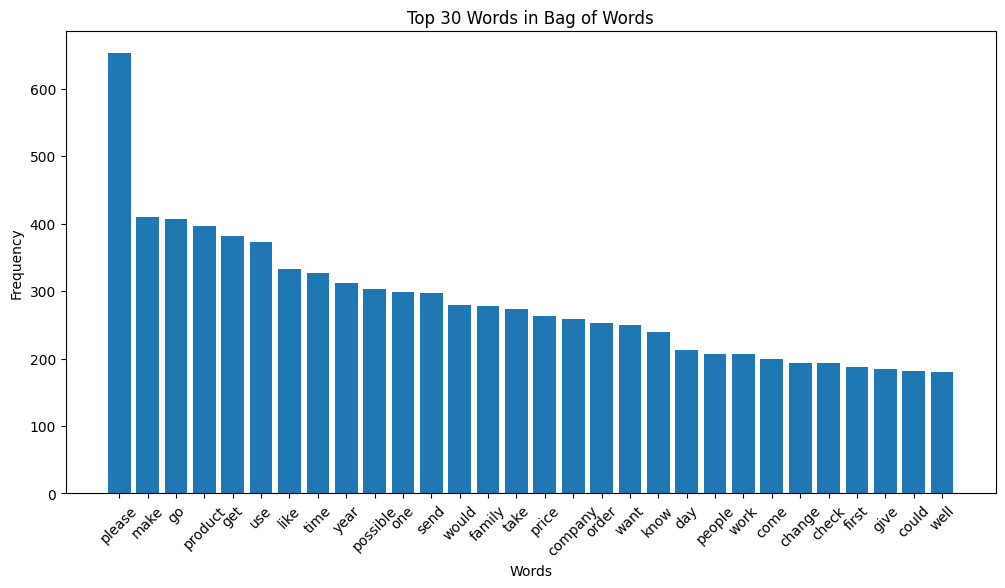

In [19]:
import matplotlib.pyplot as plt

# 단어별 빈도수 계산
word_freq = en_vector.sum(axis=0)

# 단어와 빈도수를 리스트로 변환
# 빈칸에 vectorizer 명을 넣어줍니다(위에서 cnt_vect / tfidf_vect 중에 선택한 것으로 채워주세요)
word_freq_list = [(word, freq) for word, freq in zip(cnt_vect.get_feature_names_out(), word_freq.tolist()[0])]

# 빈도수를 기준으로 내림차순 정렬
word_freq_list.sort(key=lambda x: x[1], reverse=True)

# 상위 30개 단어 선택
top_words = word_freq_list[:30]
words, freqs = zip(*top_words)

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 맑은 고딕 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words in Bag of Words')
plt.xticks(rotation=45)
plt.show()

### 3-1-2. Word2Vec(Skip-Gram)

### 과제(3)

CBOW<BR>
**Skip-Gram**은 중심 단어로부터 주변 단어를 예측하는 방식입니다. CBOW와 반대되는 방식으로, 중심 단어가 주어졌을 때 주어진 윈도우 크기 내에서 주변 단어들을 예측하도록 학습됩니다.<BR>
- in_embeddings: 중심 단어의 one-hot 벡터를 임베딩 벡터로 매핑
- out_embeddings: 해당 임베딩을 주변 단어의 one-hot 벡터를 예측하는 쪽으로 선형 변환

### 1. corpus 정의하기
- en['번역문_tokens']를 리스트로 바꿔서 corpus로 사용합니다

In [20]:
corpus = en['번역문_tokens'].tolist()

### 2. 어휘 사전(word_dict) 만들기
- Counter를 활용해서 각 단어들의 등장횟수를 세서 어휘 사전을 만듭니다

In [21]:
from collections import Counter

word_counter = Counter([word for sentence in corpus for word in sentence]) # 각 단어들의 등장 횟수를 셉니다
vocab = sorted(word_counter.keys())
word_dict = {w: i for i, w in enumerate(vocab)}
inv_dict = {i: w for w, i in word_dict.items()}

word_counter를 출력하면 다음과 같이 'pleas'의 등장 횟수는 653, 'product'의 등장 횟수는 440번, ...

In [22]:
print(word_counter)

Counter({'please': 652, 'make': 410, 'go': 406, 'product': 397, 'get': 382, 'use': 373, 'like': 332, 'time': 327, 'year': 312, 'possible': 303, 'one': 298, 'send': 297, 'would': 279, 'family': 278, 'take': 273, 'price': 263, 'company': 258, 'order': 253, 'want': 250, 'know': 239, 'b': 233, 'day': 213, 'people': 207, 'work': 206, 'come': 200, 'u': 200, 'change': 194, 'check': 193, '2': 191, 'first': 187, 'give': 184, 'could': 181, '3': 181, 'well': 180, 'good': 173, 'let': 169, 'need': 167, 'korea': 163, 'think': 160, 'place': 159, 'number': 159, 'receive': 154, 'im': 151, 'two': 145, 'also': 143, 'start': 143, '1': 141, '10': 141, 'since': 137, 'see': 134, 'may': 133, 'many': 130, 'say': 129, 'request': 124, 'room': 123, 'new': 122, 'dont': 121, 'lot': 120, 'color': 119, 'show': 119, 'different': 116, '5': 114, 'look': 114, 'korean': 112, 'call': 109, 'sometimes': 106, 'problem': 105, 'schedule': 103, 'part': 102, 'floor': 102, 'even': 102, 'test': 101, 'best': 101, 'second': 101, 'inf

word_dict는 {'단어': 등장횟수}의 형태로 데이터가 저장돼 있습니다<br>
inv_dict는 {등장 횟수: '단어'}의 형태로 데이터가 저장돼 있습니다

In [23]:
print(word_dict)
print(inv_dict)

{'0': 0, '00': 1, '000': 2, '0000': 3, '00015': 4, '000s': 5, '003': 6, '0035': 7, '007': 8, '008': 9, '0083': 10, '00a': 11, '00a01b': 12, '01': 13, '01022223333': 14, '01kw': 15, '02': 16, '027mm': 17, '029mm': 18, '02m': 19, '03': 20, '032': 21, '0327459000': 22, '0327606880': 23, '0329330605': 24, '0329374445': 25, '0329379019': 26, '04': 27, '05': 28, '055': 29, '05mm': 30, '064': 31, '06m': 32, '0737': 33, '077630': 34, '07mm': 35, '08': 36, '080005': 37, '0804': 38, '0813': 39, '0829': 40, '085': 41, '09': 42, '0925': 43, '09mm': 44, '0a09': 45, '1': 46, '10': 47, '100': 48, '1000': 49, '10000': 50, '100000': 51, '1000000': 52, '10000kcal': 53, '10000won': 54, '1000tvl': 55, '1001': 56, '10011': 57, '1001424': 58, '100pcs': 59, '100percent': 60, '100th': 61, '100yearold': 62, '101': 63, '10148': 64, '102': 65, '102400': 66, '1025': 67, '1026': 68, '1027': 69, '103': 70, '1030': 71, '104': 72, '104105': 73, '105': 74, '1050': 75, '1055': 76, '109': 77, '10900': 78, '10bytes': 79,

### 3. Skip-Gram

In [24]:
def make_skipgram_data(tokenized_corpus, word_dict, window_size=2):
    skip_gram_data = []
    for sentence in tokenized_corpus:
        for center in range(len(sentence)): # 각 중심 단어 위치를 정합니다
            center_word = word_dict[sentence[center]] # 중심 단어를 인덱스로 변환합니다
            for w in range(-window_size, window_size + 1): # 각 중심 단어에 대해, 중심 단어 기준으로 좌우 window_size만큼을 살펴보면서
                context_index = center + w
                if w != 0 and 0 <= context_index < len(sentence): # 중심 단어 자신은 제외하고 window_size의 문장 범위에 있는 경우
                    context_word = word_dict[sentence[context_index]]
                    skip_gram_data.append((center_word, context_word)) # (중심 단어, 주변 단어) 형태로 학습 데이터 튜플을 만들어서 리스트에 추가합니다.
    return skip_gram_data


ex) tokenized_corpus가 [['i','like','wine']]이고 window_size가 1일 때, skip_fram_data 리스트에는 <br>
[<br>
  (i, like), <br>
  (like, i), (like, wine), <br>
  (wine, like)<br>
]<br>
이 됩니다. <br>
(i, like): 중심단어가 i일 때, i와 1칸 떨어진 단어인 like를 예측해야 합니다.<br>
(like, i), (like, wine): 중심단어가 like일 때, like와 1칸 떨어진 단어인 i와 wine을 예측해야 합니다.


위에서 정의한 make_skipgram_data에 tokenized_corpus에는 위에서 정의한 corpus를, word_dict에는 위에서 정의한 word_dict를, window_size는 2를 넣어주세요)

In [25]:
skip_gram_data = make_skipgram_data(corpus, word_dict, window_size=2)

### 4. Skip-Gram 모델을 정의합니다.
실습 때 했던 CBOW 모델 정의와 유사합니다

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim

class SkipGram(nn.Module):
    def __init__(self, vocab_size, embedding_size):
        super(SkipGram, self).__init__()
        self.in_embeddings = nn.Embedding(vocab_size, embedding_size) # CBOW와 동일한 함수를 사용해서 단어를 임베딩합니다
        self.out_embeddings = nn.Linear(embedding_size, vocab_size, bias=False) # CBOW와 동일한 함수를 사용해서 선형 변환을 수행합니다.

    def forward(self, input_word):
        embed = self.in_embeddings(input_word)
        output = self.out_embeddings(embed)
        return output


### 5. 모델을 학습합니다
학습할 데이터가 많은 관계로 런타임-런타임 유형 변경-T4 GPU로 설정하여, GPU를 사용해서 학습합니다.

In [31]:
from tqdm import tqdm  # tqdm 불러오기

device = torch.device('cuda' if torch.cuda else 'cpu') # cuda를 사용할 수 있는 경우에는 cuda로 하고, 그렇지 않은 경우에는 cpu로 하라는 코드 완성해주세요


embedding_dim = 100
model = SkipGram(len(word_dict), embedding_dim)
model = model.to(device) # 모델을 device에서 설정한 GPU/CPU로 올립니다

criterion = nn.CrossEntropyLoss() # 여러 개의 label을 분류해야 하는 경우 어떤 손실함수를 사용해야 했죠?
optimizer = optim.Adam(model.parameters(), lr=0.01) # Adam optimizer를 사용합니다

for epoch in range(2): # 2 epoch동안 학습합니다 -> 데이터가 20만개라서 부득이하게 작게 설정했어요. 시간 여유 있으면 2를 더 큰 숫자로 바꿔서 해보세요!
    total_loss = 0
    loop = tqdm(skip_gram_data, desc=f"Epoch {epoch+1}")  # tqdm 루프 감싸기

    for center, context in loop:
        center_tensor = torch.tensor([center], dtype=torch.long).to(device) # 중심 단어 tensor를 device에서 설정한 GPU/CPU로 올립니다
        context_tensor = torch.tensor([context], dtype=torch.long).to(device) # 주변 단어 tensor를 device에서 설정한 GPU/CPU로 올립니다

        optimizer.zero_grad() # optimizer의 기울기를 0으로 초기화합니다
        output = model(center_tensor)
        loss = criterion(output, context_tensor)
        loss.backward() # 역전파를 수행합니다
        optimizer.step() # 파라미터를 업데이트합니다

        total_loss += loss.item()

        loop.set_postfix(loss=total_loss)

    print(f"Epoch {epoch+1}, Total Loss: {total_loss:.4f}")


Epoch 1: 100%|██████████| 210264/210264 [10:35<00:00, 330.95it/s, loss=2.44e+6]


Epoch 1, Total Loss: 2441492.5435


Epoch 2: 100%|██████████| 210264/210264 [10:00<00:00, 349.94it/s, loss=2.22e+6]

Epoch 2, Total Loss: 2221028.6494


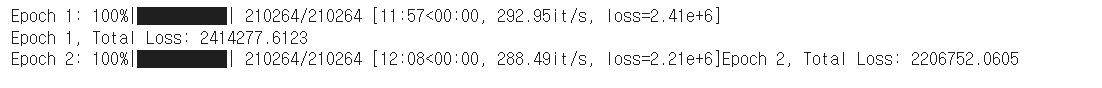

T4 GPU를 쓰면 epoch 하나당 15분 안쪽으로 걸릴 것 같아요. 실행하고 조금 기다려주세요<br>
loss가 2백만이 넘는거 좀 이상하긴 한데, 그냥 마무리하고 결과 볼게요

### 6. 학습이 끝난 후 단어 벡터를 추출합니다

In [32]:
embedding_matrix = model.in_embeddings.weight.data.cpu().numpy()

### 7. 유사도를 계산하기 위해 most_similar 함수를 정의합니다

In [33]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def most_similar(word, topn=10):
    if word not in word_dict:
        return []
    idx = word_dict[word]
    vec = embedding_matrix[idx].reshape(1, -1)
    sims = cosine_similarity(vec, embedding_matrix)[0] # cosine 유사도를 계산합니다.
    top_indices = sims.argsort()[-topn-1:][::-1]
    results = [(inv_dict[i], float(sims[i])) for i in top_indices if i != idx][:topn]
    return results

In [34]:
print(most_similar("wine"))

[('cddvdsd', 0.3947148323059082), ('waegwan', 0.3335758149623871), ('53', 0.3325420022010803), ('mattie', 0.32209181785583496), ('donghae', 0.32117024064064026), ('transparently', 0.3149825930595398), ('precondition', 0.31053948402404785), ('violent', 0.3105003833770752), ('fought', 0.30819201469421387), ('sophy', 0.30059459805488586)]


In [35]:
print(most_similar("like"))

[('washburn', 0.44565820693969727), ('seller', 0.371143102645874), ('read', 0.36546123027801514), ('differ', 0.35041242837905884), ('praise', 0.3427214026451111), ('350', 0.3356620967388153), ('solution', 0.3313404619693756), ('007', 0.3297302722930908), ('rather', 0.3288561999797821), ('key', 0.32458463311195374)]


### 8. 시각화를 진행합니다

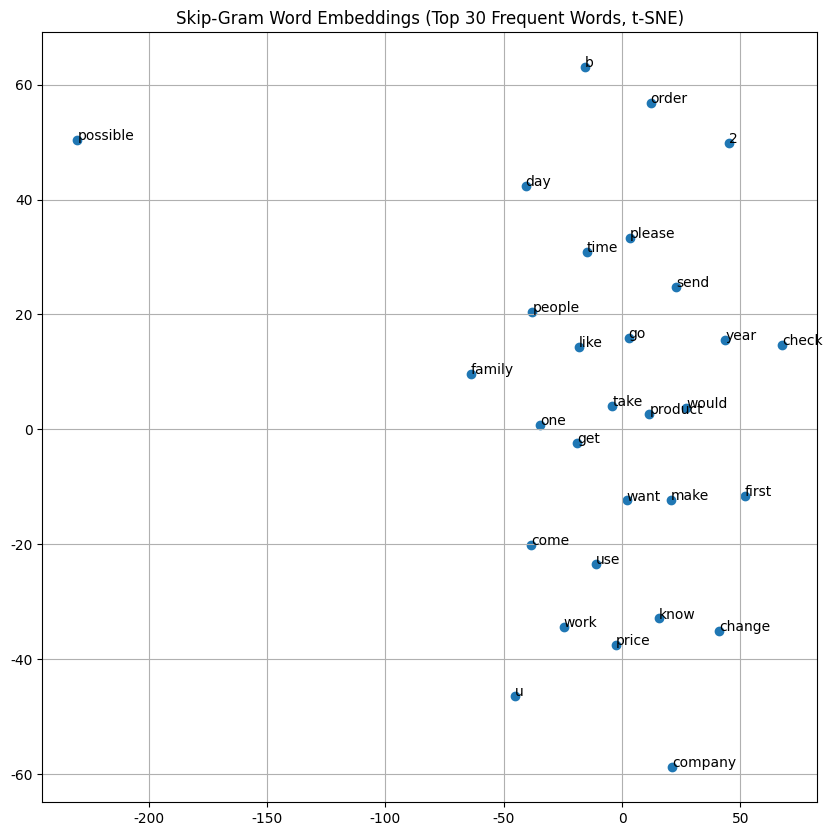

In [36]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 등장 횟수 기준 상위 30개 단어 선택
top30_words = [word for word, _ in word_counter.most_common(30)]
top30_indices = [word_dict[word] for word in top30_words]
top30_vectors = embedding_matrix[top30_indices]

# t-SNE로 차원 축소
tsne = TSNE(n_components=2, init='pca', learning_rate='auto', perplexity=15)
top30_vectors_2d = tsne.fit_transform(top30_vectors)

# 시각화
plt.figure(figsize=(10, 10))
plt.scatter(top30_vectors_2d[:, 0], top30_vectors_2d[:, 1])
for i, word in enumerate(top30_words):
    plt.annotate(word, xy=(top30_vectors_2d[i, 0], top30_vectors_2d[i, 1]))
plt.title("Skip-Gram Word Embeddings (Top 30 Frequent Words, t-SNE)")
plt.grid()
plt.show()


20만개의 학습 데이터에 대해, 학습을 2 epoch만 했기 때문에 부족한 결과가 나왔지만, 이렇게 한다는 logic만 가져가 주세요!

## 2-2. 한국어: 텍스트 전처리 (text preprocessing)

### 2-2-1. 클렌징(cleansing)

In [37]:
import re

def cleansing(text):
    # 한국어 외 문자 제거
    text = re.sub(r'[^ㄱ-ㅣ가-힣\s]', '', text)

    # 공백 제거
    text = text.strip()

    return text

ko['원문'] = ko['원문'].apply(cleansing) # cleansing을 적용합니다

In [38]:
ko

,원문
SID,
1,은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다
2,씨티은행에서 일하세요
3,푸리토의 베스트셀러는 해외에서 입소문만으로 차 완판을 기록하였다
4,장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다
5,사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다
...,...
9996,같이 춤추다가 너무 즐거워서 어쩌면 우리는 현실로 안 돌아올지도 모릅니다
9997,같이 프로젝트 하기로 되어있던 제 파트너는 어떻게 되는 건가요
9998,같이 했던 친구들과 싸우는 내용이에요


### 2-2-2. 토큰화(tokenization) + 형태소 분석
토큰화를 진행하면서 단어를 Stemming해주고, `조사`를 분석 대상에서 제외합니다.

### (4) 과제
okt.tagset 코드를 실행해 `조사`에 해당하는 태그를 찾고, 이를 토큰화 함수 내 빈칸에 작성하세요.

In [39]:
!pip install konlpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 114.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 44.3 MB/s eta 0:00:00


In [40]:
from konlpy.tag import Okt

okt = Okt()

okt.tagset # 부착되는 품사 태그의 기호와 의미 확인

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [41]:
from konlpy.tag import Okt

okt = Okt()

# 토큰화 함수 정의
def tokenization(text):
    # 조사('Josa')를 제외하고 형태소만 추출
    tokens = [_[0] for _ in okt.pos(text, stem=True) if not _[1] == 'Josa' ]
    return tokens


# '원문' 열에 토큰화 함수 적용
ko['원문_tokens'] = ko['원문'].apply(tokenization) # tokenization을 적용합니다

In [42]:
ko

,원문,원문_tokens
SID,,
1,은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다,"[은, 성경, 아름답다, 이야기, 체험, 하다, 수, 있다, 컬러링, 앱, 이다]"
2,씨티은행에서 일하세요,"[씨티, 은행, 일, 하다]"
3,푸리토의 베스트셀러는 해외에서 입소문만으로 차 완판을 기록하였다,"[푸리, 토의, 베스트셀러, 해외, 입, 소문, 차, 완판, 기록, 하다]"
4,장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다,"[장, 예수님, 이번, 나사, 를, 무덤, 불다, 죽다, 자, 가운데, 살리다]"
5,사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다,"[사이즈, 몇, 개, 더, 재, 입다, 되다, 제, 알다, 감사하다]"
...,...,...
9996,같이 춤추다가 너무 즐거워서 어쩌면 우리는 현실로 안 돌아올지도 모릅니다,"[같이, 춤추다, 너무, 즐겁다, 어쩌면, 우리, 현실, 안, 돌아오다, 모르다]"
9997,같이 프로젝트 하기로 되어있던 제 파트너는 어떻게 되는 건가요,"[같이, 프로젝트, 하다, 되어다, 제, 파트너, 어떻다, 되다, 건가]"
9998,같이 했던 친구들과 싸우는 내용이에요,"[같이, 하다, 친구, 들, 싸우다, 내용]"


### 2-2-3. 정제 (cleaning)
한국어 stop words 리스트를 불러옵니다.  
출처) https://www.ranks.nl/stopwords/korean

In [43]:
f = open('Korean stop words.txt', encoding='utf-8')
stop_words = f.read()
stop_words = stop_words.split('\n')
f.close()

stop_words[:10]

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']

In [45]:
# 정제 함수
def cleaning(tokens):
    # 불용어 제거
    tokens = [token for token in tokens if not token in stop_words]
    return tokens

# '번역문_tokens'을 정제와 정규화합니다.
ko['원문_tokens'] = ko['원문_tokens'].apply(cleaning)

In [46]:
ko

,원문,원문_tokens
SID,,
1,은 성경의 아름다운 이야기를 체험 할 수 있는 컬러링 앱입니다,"[은, 성경, 아름답다, 이야기, 체험, 하다, 수, 컬러링, 앱, 이다]"
2,씨티은행에서 일하세요,"[씨티, 은행, 하다]"
3,푸리토의 베스트셀러는 해외에서 입소문만으로 차 완판을 기록하였다,"[푸리, 토의, 베스트셀러, 해외, 입, 소문, 차, 완판, 기록, 하다]"
4,장에서는 예수님이 이번엔 나사로를 무덤에서 불러내어 죽은 자 가운데서 살리셨습니다,"[장, 예수님, 나사, 무덤, 불다, 죽다, 가운데, 살리다]"
5,사이즈가 몇 개나 더 재입고 될지 제게 알려주시면 감사하겠습니다,"[사이즈, 개, 더, 재, 입다, 되다, 알다, 감사하다]"
...,...,...
9996,같이 춤추다가 너무 즐거워서 어쩌면 우리는 현실로 안 돌아올지도 모릅니다,"[춤추다, 너무, 즐겁다, 어쩌면, 현실, 안, 돌아오다, 모르다]"
9997,같이 프로젝트 하기로 되어있던 제 파트너는 어떻게 되는 건가요,"[프로젝트, 하다, 되어다, 파트너, 어떻다, 되다, 건가]"
9998,같이 했던 친구들과 싸우는 내용이에요,"[하다, 친구, 싸우다, 내용]"


## 3-2. 한국어: 피처 벡터화 (feature vectorization)

### 3-2-1. Bag of words (BoW)
- BoW 방식 중 TF-IDF 방법을 사용합니다.

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 객체 생성
vectorizer = TfidfVectorizer()

# '원문_tokens'를 문자열로 변환하여 리스트로 저장
sentences = ko['원문_tokens'].apply(' '.join).tolist()

# 문장 리스트로 TF-IDF 변환(fit과 transform 동시에)
ko_vector = vectorizer.fit_transform(sentences)

ko_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 60734 stored elements and shape (10000, 9666)>

In [48]:
# BoW 피처 확인
print(ko_vector.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.58574994 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [49]:
# 단어 사전 확인
# 빈칸에 vectorizer 명을 넣어줍니다(위 빈칸과 동일)
print(vectorizer.get_feature_names_out())

['가가' '가게' '가격' ... '힘드다' '힘들다' '힙합']


빈도수 상위 30개 단어를 막대그래프로 시각화해줍니다.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46104 (\N{HANGUL SYLLABLE DOE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local

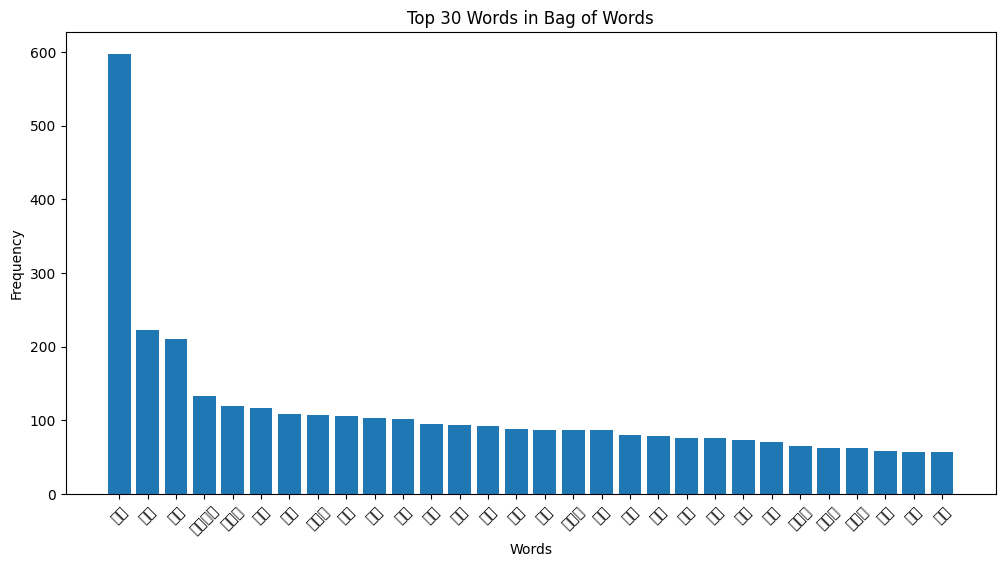

In [50]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 맑은 고딕 폰트
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 단어별 빈도수 계산
word_freq = ko_vector.sum(axis=0)

# 단어와 빈도수를 리스트로 변환
word_freq_list = [(word, freq) for word, freq in zip(vectorizer.get_feature_names_out(), word_freq.tolist()[0])]

# 빈도수를 기준으로 내림차순 정렬
word_freq_list.sort(key=lambda x: x[1], reverse=True)

# 상위 30개 단어 선택
top_words = word_freq_list[:30]
words, freqs = zip(*top_words)

# 막대 그래프로 시각화
plt.figure(figsize=(12, 6))
plt.bar(words, freqs)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Words in Bag of Words')
plt.xticks(rotation=45)
plt.show()

In [51]:
top_words

[('하다', 597.2146243051342),
 ('되다', 223.1321948520917),
 ('이다', 210.52661494389582),
 ('가능하다', 133.71828620335663),
 ('되어다', 119.29410026386184),
 ('가다', 116.57540133330572),
 ('늘다', 108.53736698902802),
 ('보내다', 107.87711882882529),
 ('오다', 105.3905451842537),
 ('제품', 102.69379251257912),
 ('않다', 102.27021682982166),
 ('가장', 95.36597597683756),
 ('없다', 93.33670620809494),
 ('좋다', 92.45599817918472),
 ('가격', 89.08007758044077),
 ('받다', 86.9857492686598),
 ('해주다', 86.82760691556945),
 ('가족', 86.8097536662777),
 ('싶다', 80.53365930926846),
 ('확인', 79.0856727085835),
 ('보다', 76.65802895367155),
 ('사용', 75.67616148767152),
 ('진행', 73.84446428389711),
 ('알다', 71.15983725961868),
 ('드리다', 64.84556601036725),
 ('어떻다', 62.69587828340003),
 ('바라다', 62.03875729842768),
 ('사람', 58.2192605650728),
 ('한국', 57.52529305421715),
 ('가지', 57.240757467170496)]

고생하셨습니다!!